In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec # subplots
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from scipy.stats import randint

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  # Ignore DeprecationWarnings

In [2]:
#Loads dataset
df = pd.read_csv("data.csv",header = 0)

#Displays the first few rows of the dataset
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,84232,M,17.99,1.38,122.80,11.0,0.1184,0.2776,0.3100,0.1471,...,25.38,17.33,184.60,219.0,0.1622,0.6656,0.7119,0.2654,0.4610,0.1189
1,842517,M,2.57,17.77,132.90,1326.0,0.8474,0.7864,0.8690,0.7170,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.8920
2,84393,M,19.69,21.25,13.00,123.0,0.1960,0.1599,0.1974,0.1279,...,23.57,25.53,152.50,179.0,0.1444,0.4245,0.4540,0.2430,0.3613,0.8758
3,8434831,M,11.42,2.38,77.58,386.1,0.1425,0.2839,0.2414,0.1520,...,14.91,26.50,98.87,567.7,0.2980,0.8663,0.6869,0.2575,0.6638,0.1730
4,8435842,M,2.29,14.34,135.10,1297.0,0.1300,0.1328,0.1980,0.1430,...,22.54,16.67,152.20,1575.0,0.1374,0.2500,0.4000,0.1625,0.2364,0.7678


In [3]:
#Check the number of rows in dataset
len(df)

569

In [4]:
#prints the column names
print(df.shape)


(569, 32)


In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,568.000000,...,568.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,2.272131e+06,12.839928,17.704886,78.244460,501.404042,0.598962,0.434747,0.364564,0.409364,0.185037,...,15.011114,23.409121,88.391002,670.293146,0.198192,0.345474,0.379951,0.397990,0.294569,0.683511
std,7.129227e+06,4.936937,6.404946,36.791082,371.912434,0.367111,0.289127,0.250157,0.266640,0.033502,...,6.037506,9.024791,47.084157,596.653948,0.205708,0.223029,0.234212,0.287516,0.064995,0.254732
min,8.670000e+02,1.160000,1.380000,1.000000,3.200000,0.100000,0.110000,0.000000,0.000000,0.116700,...,1.100000,2.140000,1.200000,3.200000,0.110000,0.100000,0.000000,0.000000,0.156500,0.110000
25%,9.148500e+04,11.500000,15.180000,65.850000,244.000000,0.149000,0.149700,0.167600,0.189600,0.162000,...,12.602500,19.270000,69.470000,273.000000,0.126500,0.181200,0.188700,0.161300,0.251400,0.656300
50%,8.692540e+05,13.110000,18.170000,81.290000,463.700000,0.813900,0.387200,0.273300,0.313200,0.179250,...,14.495000,24.620000,87.360000,547.400000,0.139800,0.266000,0.331000,0.252400,0.282900,0.761000
75%,9.147690e+05,15.280000,21.780000,94.570000,656.900000,0.920000,0.690000,0.494400,0.613900,0.196250,...,17.585000,28.600000,117.200000,826.400000,0.155900,0.425700,0.518600,0.650000,0.326000,0.838500
max,9.112962e+07,28.110000,39.280000,188.500000,2499.000000,0.999700,0.997000,0.996600,0.996100,0.340000,...,36.400000,49.540000,251.200000,4254.000000,0.999400,1.580000,1.252000,0.999300,0.663800,0.998100


In [6]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [8]:
# Replacing the 0 values as null and dropping rows with null values
df.replace(0, pd.NA, inplace=True)
df.dropna(inplace=True)
len(df)

546

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,84232,M,17.99,1.38,122.80,11.0,0.1184,0.2776,0.31,0.1471,...,25.38,17.33,184.60,219.0,0.1622,0.6656,0.7119,0.2654,0.4610,0.1189
1,842517,M,2.57,17.77,132.90,1326.0,0.8474,0.7864,0.869,0.717,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.8920
2,84393,M,19.69,21.25,13.00,123.0,0.1960,0.1599,0.1974,0.1279,...,23.57,25.53,152.50,179.0,0.1444,0.4245,0.454,0.243,0.3613,0.8758
3,8434831,M,11.42,2.38,77.58,386.1,0.1425,0.2839,0.2414,0.152,...,14.91,26.50,98.87,567.7,0.2980,0.8663,0.6869,0.2575,0.6638,0.1730
4,8435842,M,2.29,14.34,135.10,1297.0,0.1300,0.1328,0.198,0.143,...,22.54,16.67,152.20,1575.0,0.1374,0.2500,0.4,0.1625,0.2364,0.7678


Text(0.5, 1.0, 'Distribution of Diagnosis')

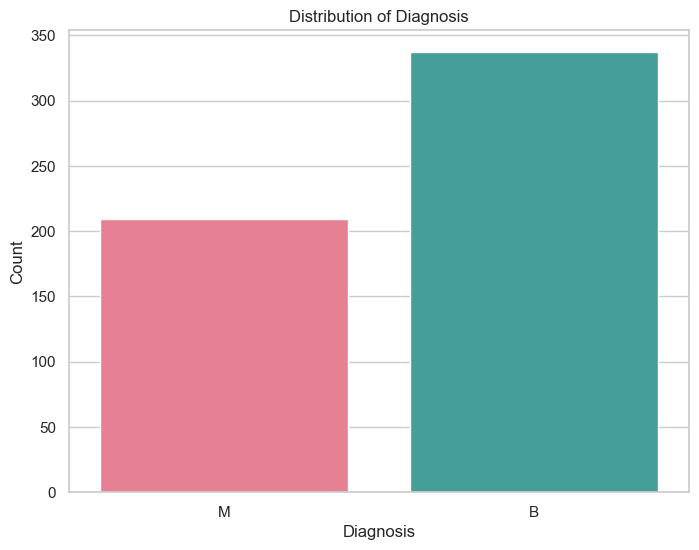

In [10]:
#displaying the countplots
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, palette='husl')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis')

In [11]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,84232,1,17.99,1.38,122.80,11.0,0.1184,0.2776,0.31,0.1471,...,25.38,17.33,184.60,219.0,0.1622,0.6656,0.7119,0.2654,0.4610,0.1189
1,842517,1,2.57,17.77,132.90,1326.0,0.8474,0.7864,0.869,0.717,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.8920
2,84393,1,19.69,21.25,13.00,123.0,0.1960,0.1599,0.1974,0.1279,...,23.57,25.53,152.50,179.0,0.1444,0.4245,0.454,0.243,0.3613,0.8758
3,8434831,1,11.42,2.38,77.58,386.1,0.1425,0.2839,0.2414,0.152,...,14.91,26.50,98.87,567.7,0.2980,0.8663,0.6869,0.2575,0.6638,0.1730
4,8435842,1,2.29,14.34,135.10,1297.0,0.1300,0.1328,0.198,0.143,...,22.54,16.67,152.20,1575.0,0.1374,0.2500,0.4,0.1625,0.2364,0.7678


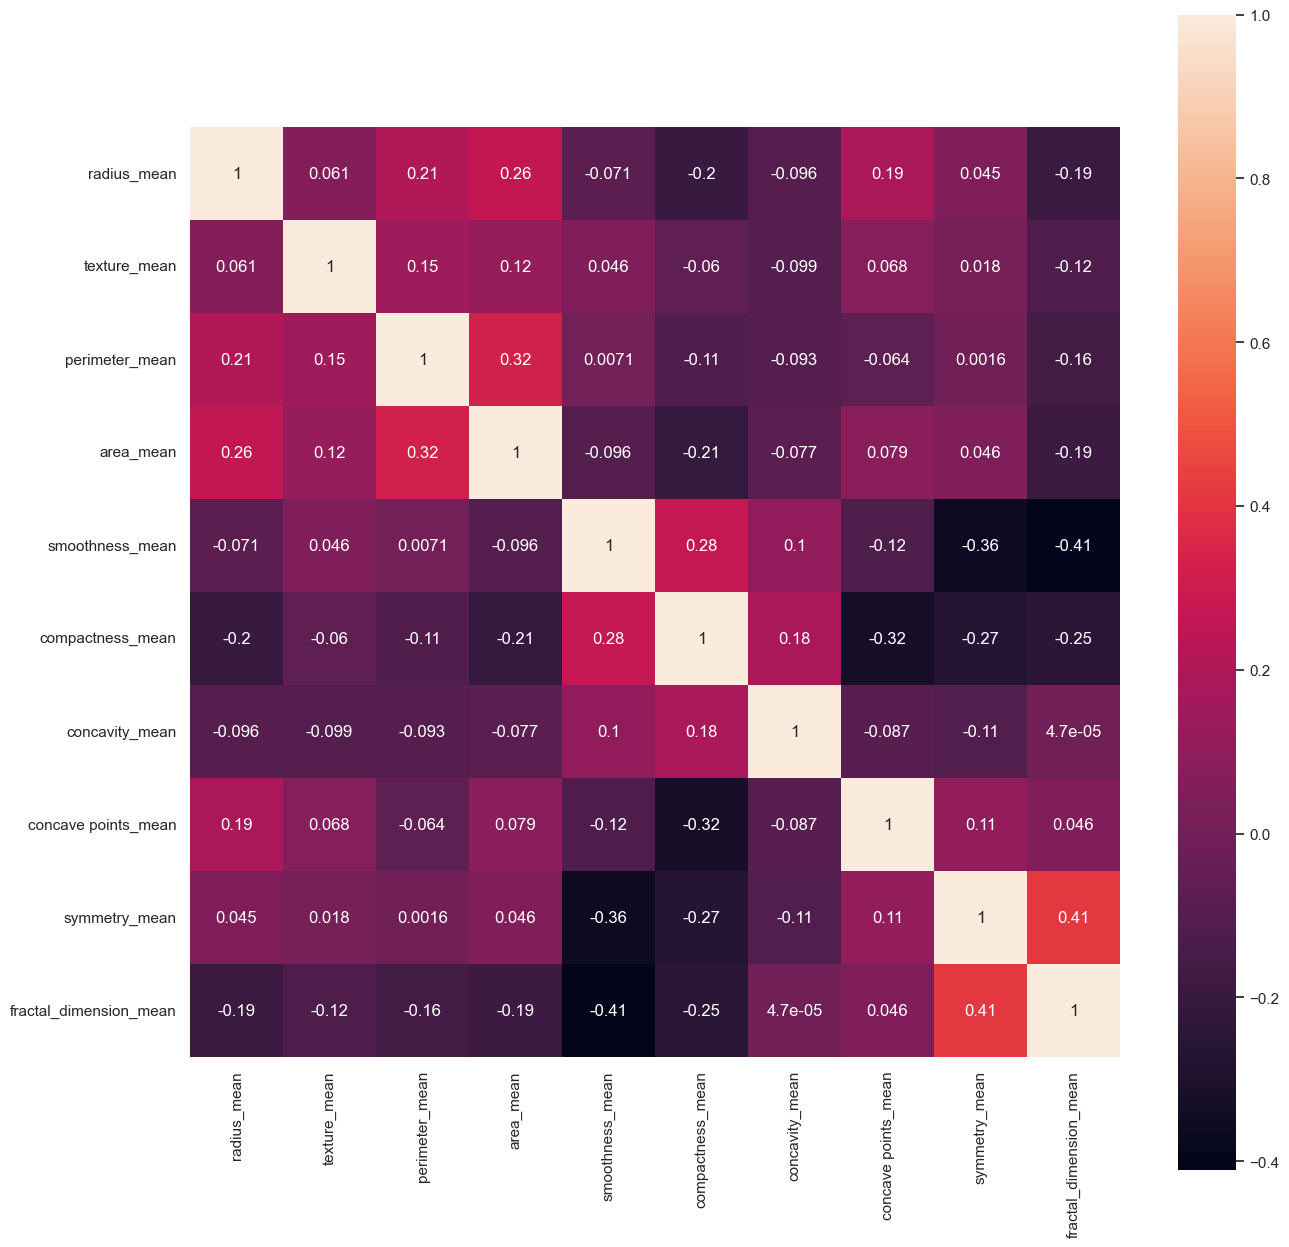

In [12]:
features_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
plt.figure(figsize=(15,15))
heat = sns.heatmap(df[features_mean].corr(), vmax=1, square=True, annot=True)

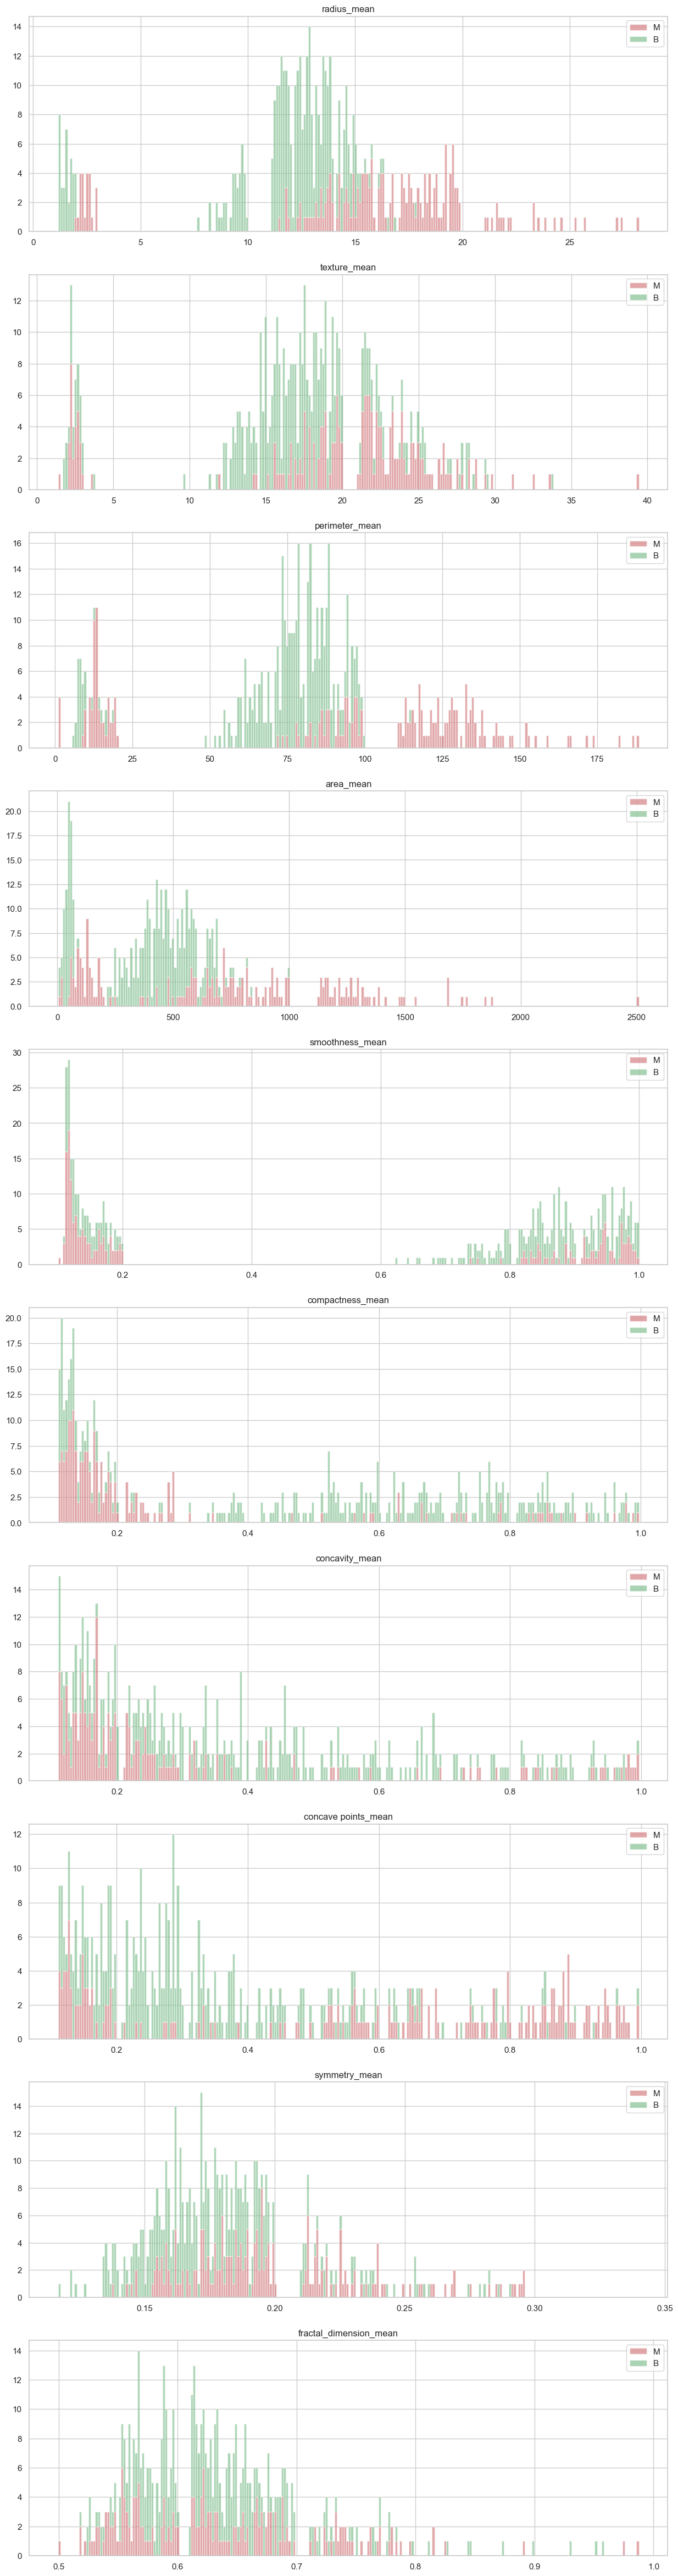

In [13]:
# Splitting the dataset into malignant and benign
dataMalignant=df[df['diagnosis'] ==1]
dataBenign=df[df['diagnosis'] ==0]

features_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

#Plotting these features as a histogram
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(15,60))
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/250
    ax.hist([dataMalignant[features_mean[idx]],dataBenign[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.show()

In [14]:
X = df.drop(columns=['diagnosis'], axis=1) # Note : dropping column axis = 1; dropping row then axis = 0
Y = df['diagnosis']

In [15]:
print(X)

          id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      84232        17.99          1.38          122.80       11.0   
1     842517         2.57         17.77          132.90     1326.0   
2      84393        19.69         21.25           13.00      123.0   
3    8434831        11.42          2.38           77.58      386.1   
4    8435842         2.29         14.34          135.10     1297.0   
..       ...          ...           ...             ...        ...   
563   926125         2.92         25.90          143.00     1347.0   
564   926424        21.56         22.39          142.00     1479.0   
565   926682         2.13         28.25           90.87     1261.0   
566   926954        16.60         28.80           18.30      858.1   
567   927241         2.60         29.33           14.10     1265.0   

     smoothness_mean  compactness_mean concavity_mean concave points_mean  \
0             0.1184            0.2776           0.31              0.1471   
1    

In [16]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
563    1
564    1
565    1
566    1
567    1
Name: diagnosis, Length: 546, dtype: int64


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=99)

In [18]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(546, 31)
(436, 31)
(110, 31)


In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(X_train)

StandardScaler()

In [21]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
print(X_train)

[[-0.17829228  0.11757205 -0.4877838  ... -0.97182754  0.40082139
   0.97055993]
 [-0.18368295 -0.22019436 -0.17279644 ... -0.78452862  4.22563577
  -2.14973129]
 [-0.29194682 -0.30918671 -0.01530276 ...  1.63021389  0.01939114
   0.35590999]
 ...
 [-0.28217796  0.52006016 -0.91890286 ... -0.7979576   0.38430276
  -2.22748587]
 [-0.28212397 -0.02400669  0.59558181 ...  0.24314169 -1.17295382
   0.01612248]
 [-0.1856261   0.77894699  0.62421703 ... -0.80290512  2.85759262
   0.70114032]]


In [23]:
modelKNN = KNeighborsClassifier(n_neighbors=3)

# Training the KNN modelKNN with training data
modelKNN.fit(X_train, y_train)

# Accuracy on test data
X_test_pred = modelKNN.predict(X_test)
report=(classification_report(y_test,X_test_pred))
print('\nEvaluation Metrics:\n')
print(report)



Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        60
           1       0.95      0.70      0.80        50

    accuracy                           0.85       110
   macro avg       0.87      0.83      0.84       110
weighted avg       0.86      0.85      0.84       110



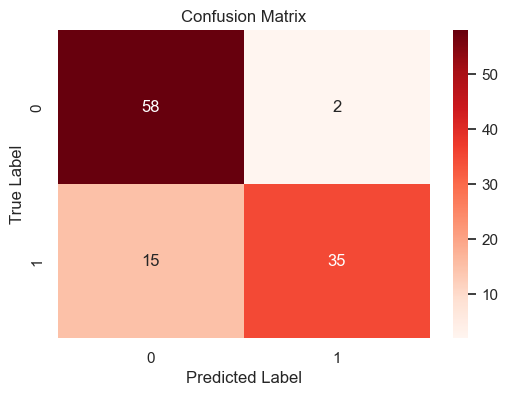

In [24]:
conf_matrix = confusion_matrix(y_test, X_test_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
# Create an SVM model
modelSVM = SVC(kernel='linear', C=1)  # You can choose different kernels and hyperparameters based on your problem

# Training the SVM model with training data
modelSVM.fit(X_train, y_train)

# Accuracy on test data
X_test_pred_svm = modelSVM.predict(X_test)

report=(classification_report(y_test,X_test_pred_svm))
print('\nEvaluation Metrics:\n')
print(report)



Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        60
           1       0.91      0.84      0.87        50

    accuracy                           0.89       110
   macro avg       0.89      0.89      0.89       110
weighted avg       0.89      0.89      0.89       110



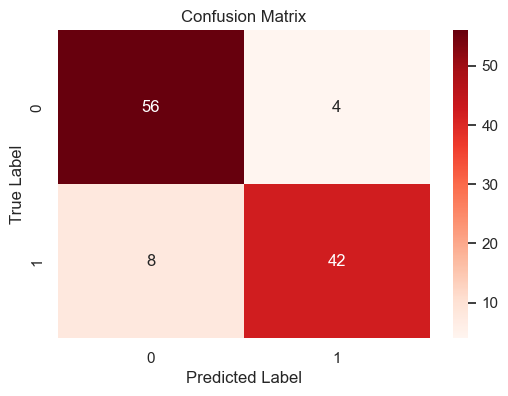

In [26]:
conf_matrix = confusion_matrix(y_test, X_test_pred_svm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
# Create a Random Forest model
modelRF = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators and other hyperparameters

# Training the Random Forest model with training data
modelRF.fit(X_train, y_train)

# Accuracy on test data
X_test_pred_rf = modelRF.predict(X_test)
report=(classification_report(y_test,X_test_pred_rf))
print('\nEvaluation Metrics:\n')
print(report)


Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.92      0.88      0.90        50

    accuracy                           0.91       110
   macro avg       0.91      0.91      0.91       110
weighted avg       0.91      0.91      0.91       110



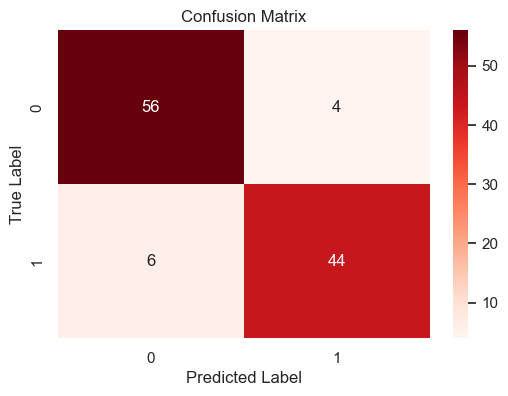

In [28]:
conf_matrix = confusion_matrix(y_test, X_test_pred_rf)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [29]:
# Define the parameter distributions to search
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None] + list(range(5, 26)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Create a Random Forest model
modelRF = RandomForestClassifier(random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=modelRF, param_distributions=param_dist, n_iter=50, cv=10, random_state=42,verbose=2,n_jobs=4)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Print the top 10 best hyperparameter combinations
print("Top 10 Best Hyperparameter Combinations:")
for i, params in enumerate(random_search.cv_results_['params'][:10]):
    print(f"{i + 1}. {params}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Top 10 Best Hyperparameter Combinations:
1. {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 206}
2. {'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 221}
3. {'max_depth': 22, 'min_samples_leaf': 7, 'min_samples_split': 12, 'n_estimators': 187}
4. {'max_depth': 24, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 251}
5. {'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 187}
6. {'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 291}
7. {'max_depth': 24, 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 157}
8. {'max_depth': 25, 'min_samples_leaf': 9, 'min_samples_split': 18, 'n_estimators': 158}
9. {'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 154}
10. {'max_depth': 23, 'min_samples_leaf': 9, 'min_samples_split': 4, 'n_estimators': 150}


In [30]:
# Use the best hyperparameters to create the final model
best_model_random = RandomForestClassifier(
    n_estimators=64,
    max_depth=15,
    min_samples_split=6,
    min_samples_leaf=4,
    random_state=66
)

# Training the Random Forest model with training data
best_model_random.fit(X_train, y_train)
X_test_pred_best_random = best_model_random.predict(X_test)
# Evaluate the model
accuracy = best_model_random.score(X_test, y_test)
precision = precision_score(y_test, X_test_pred_best_random)
recall = recall_score(y_test, X_test_pred_best_random)

print("Testing Score:")
print("Accuracy: ", accuracy*100, "%")
print("Precision: ", precision*100, "%")
print("Recall: ", recall*100, "%")

report=(classification_report(y_test,X_test_pred_best_random))
print('\nEvaluation Metrics:\n')
print(report)

Testing Score:
Accuracy:  92.72727272727272 %
Precision:  93.75 %
Recall:  90.0 %

Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        60
           1       0.94      0.90      0.92        50

    accuracy                           0.93       110
   macro avg       0.93      0.93      0.93       110
weighted avg       0.93      0.93      0.93       110



In [31]:
# Use the best hyperparameters to create the final model
best_model_random = RandomForestClassifier(
    n_estimators=70,
    max_depth=19,
    min_samples_split=6,
    min_samples_leaf=4,
    random_state=42
)

# Training the Random Forest model with training data
best_model_random.fit(X_train, y_train)
X_test_pred_best_random = best_model_random.predict(X_test)
accuracy = best_model_random.score(X_test, y_test)
precision = precision_score(y_test, X_test_pred_best_random)
recall = recall_score(y_test, X_test_pred_best_random)

print("Testing Score:")
print("Accuracy: ", accuracy*100, "%")
print("Precision: ", precision*100, "%")
print("Recall: ", recall*100, "%")

report=(classification_report(y_test,X_test_pred_best_random))
print('\nEvaluation Metrics:\n')
print(report)

Testing Score:
Accuracy:  93.63636363636364 %
Precision:  95.74468085106383 %
Recall:  90.0 %

Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        60
           1       0.96      0.90      0.93        50

    accuracy                           0.94       110
   macro avg       0.94      0.93      0.94       110
weighted avg       0.94      0.94      0.94       110



In [32]:
# Use the best hyperparameters to create the final model
best_model_random = RandomForestClassifier(
    n_estimators=124,
    max_depth=15,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)

# Training the Random Forest model with training data
best_model_random.fit(X_train, y_train)
X_test_pred_best_random = best_model_random.predict(X_test)

accuracy = best_model_random.score(X_test, y_test)
precision = precision_score(y_test, X_test_pred_best_random)
recall = recall_score(y_test, X_test_pred_best_random)

print("Testing Score:")
print("Accuracy: ", accuracy*100, "%")
print("Precision: ", precision*100, "%")
print("Recall: ", recall*100, "%")

report=(classification_report(y_test,X_test_pred_best_random))
print('\nEvaluation Metrics:\n')
print(report)

Testing Score:
Accuracy:  93.63636363636364 %
Precision:  95.74468085106383 %
Recall:  90.0 %

Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        60
           1       0.96      0.90      0.93        50

    accuracy                           0.94       110
   macro avg       0.94      0.93      0.94       110
weighted avg       0.94      0.94      0.94       110



In [33]:
# Use the best hyperparameters to create the final model
best_model_random = RandomForestClassifier(
    n_estimators=128,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)

# Training the Random Forest model with training data
best_model_random.fit(X_train, y_train)
X_test_pred_best_random = best_model_random.predict(X_test)

accuracy = best_model_random.score(X_test, y_test)
precision = precision_score(y_test, X_test_pred_best_random)
recall = recall_score(y_test, X_test_pred_best_random)

print("Testing Score:")
print("Accuracy: ", accuracy*100, "%")
print("Precision: ", precision*100, "%")
print("Recall: ", recall*100, "%")

report=(classification_report(y_test,X_test_pred_best_random))
print('\nEvaluation Metrics:\n')
print(report)

Testing Score:
Accuracy:  93.63636363636364 %
Precision:  95.74468085106383 %
Recall:  90.0 %

Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        60
           1       0.96      0.90      0.93        50

    accuracy                           0.94       110
   macro avg       0.94      0.93      0.94       110
weighted avg       0.94      0.94      0.94       110



In [34]:
# Use the best hyperparameters to create the final model
best_model_random = RandomForestClassifier(
    n_estimators=149,
    max_depth=19,
    min_samples_split=6,
    min_samples_leaf=4,
    random_state=42
)

# Training the Random Forest model with training data
best_model_random.fit(X_train, y_train)
X_test_pred_best_random = best_model_random.predict(X_test)

accuracy = best_model_random.score(X_test, y_test)
precision = precision_score(y_test, X_test_pred_best_random)
recall = recall_score(y_test, X_test_pred_best_random)

print("Testing Score:")
print("Accuracy: ", accuracy*100, "%")
print("Precision: ", precision*100, "%")
print("Recall: ", recall*100, "%")

report=(classification_report(y_test,X_test_pred_best_random))
print('\nEvaluation Metrics:\n')
print(report)

Testing Score:
Accuracy:  93.63636363636364 %
Precision:  95.74468085106383 %
Recall:  90.0 %

Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        60
           1       0.96      0.90      0.93        50

    accuracy                           0.94       110
   macro avg       0.94      0.93      0.94       110
weighted avg       0.94      0.94      0.94       110



In [35]:
best_model_random = RandomForestClassifier(
    n_estimators=70,
    max_depth=22,
    min_samples_split=7,
    min_samples_leaf=4,
    random_state=62
)

# Training the Random Forest model with training data
best_model_random.fit(X_train, y_train)
X_test_pred_best_random = best_model_random.predict(X_test)

accuracy = best_model_random.score(X_test, y_test)
precision = precision_score(y_test, X_test_pred_best_random)
recall = recall_score(y_test, X_test_pred_best_random)

print("Testing Score:")
print("Accuracy: ", accuracy*100, "%")
print("Precision: ", precision*100, "%")
print("Recall: ", recall*100, "%")

report=(classification_report(y_test,X_test_pred_best_random))
print('\nEvaluation Metrics:\n')
print(report)

Testing Score:
Accuracy:  92.72727272727272 %
Precision:  93.75 %
Recall:  90.0 %

Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        60
           1       0.94      0.90      0.92        50

    accuracy                           0.93       110
   macro avg       0.93      0.93      0.93       110
weighted avg       0.93      0.93      0.93       110



In [36]:
best_model_random = RandomForestClassifier(
    n_estimators=87,
    max_depth=20,
    min_samples_split=9,
    min_samples_leaf=2,
    random_state=99
)

# Training the Random Forest model with training data
best_model_random.fit(X_train, y_train)
X_test_pred_best_random = best_model_random.predict(X_test)

accuracy = best_model_random.score(X_test, y_test)
precision = precision_score(y_test, X_test_pred_best_random)
recall = recall_score(y_test, X_test_pred_best_random)

print("Testing Score:")
print("Accuracy: ", accuracy*100, "%")
print("Precision: ", precision*100, "%")
print("Recall: ", recall*100, "%")

report=(classification_report(y_test,X_test_pred_best_random))
print('\nEvaluation Metrics:\n')
print(report)

Testing Score:
Accuracy:  93.63636363636364 %
Precision:  95.74468085106383 %
Recall:  90.0 %

Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        60
           1       0.96      0.90      0.93        50

    accuracy                           0.94       110
   macro avg       0.94      0.93      0.94       110
weighted avg       0.94      0.94      0.94       110



In [37]:
best_model_random = RandomForestClassifier(
    n_estimators=108,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=69
)

# Training the Random Forest model with training data
best_model_random.fit(X_train, y_train)
X_test_pred_best_random = best_model_random.predict(X_test)

accuracy = best_model_random.score(X_test, y_test)
precision = precision_score(y_test, X_test_pred_best_random)
recall = recall_score(y_test, X_test_pred_best_random)

print("Testing Score:")
print("Accuracy: ", accuracy*100, "%")
print("Precision: ", precision*100, "%")
print("Recall: ", recall*100, "%")

report=(classification_report(y_test,X_test_pred_best_random))
print('\nEvaluation Metrics:\n')
print(report)

Testing Score:
Accuracy:  92.72727272727272 %
Precision:  95.65217391304348 %
Recall:  88.0 %

Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        60
           1       0.96      0.88      0.92        50

    accuracy                           0.93       110
   macro avg       0.93      0.92      0.93       110
weighted avg       0.93      0.93      0.93       110



In [38]:
best_model_random = RandomForestClassifier(
    n_estimators=105,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=69
)

# Training the Random Forest model with training data
best_model_random.fit(X_train, y_train)
X_test_pred_best_random = best_model_random.predict(X_test)

accuracy = best_model_random.score(X_test, y_test)
precision = precision_score(y_test, X_test_pred_best_random)
recall = recall_score(y_test, X_test_pred_best_random)

print("Testing Score:")
print("Accuracy: ", accuracy*100, "%")
print("Precision: ", precision*100, "%")
print("Recall: ", recall*100, "%")

report=(classification_report(y_test,X_test_pred_best_random))
print('\nEvaluation Metrics:\n')
print(report)

Testing Score:
Accuracy:  94.54545454545455 %
Precision:  95.83333333333334 %
Recall:  92.0 %

Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        60
           1       0.96      0.92      0.94        50

    accuracy                           0.95       110
   macro avg       0.95      0.94      0.94       110
weighted avg       0.95      0.95      0.95       110



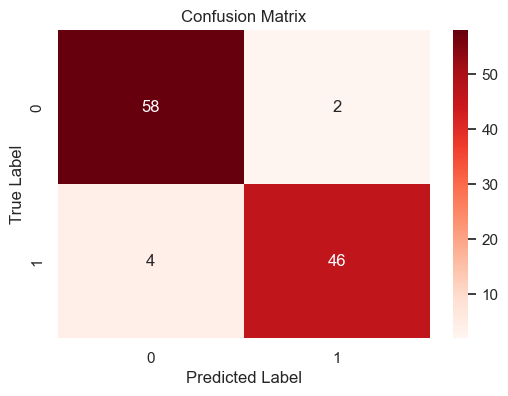

In [39]:
conf_matrix = confusion_matrix(y_test, X_test_pred_best_random)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [40]:
best_model_random = RandomForestClassifier(
    n_estimators=289,
    max_depth=15,
    min_samples_split=3,
    min_samples_leaf=9,
    random_state=66
)

# Training the Random Forest model with training data
best_model_random.fit(X_train, y_train)
X_test_pred_best_random = best_model_random.predict(X_test)

accuracy = best_model_random.score(X_test, y_test)
precision = precision_score(y_test, X_test_pred_best_random)
recall = recall_score(y_test, X_test_pred_best_random)

print("Testing Score:")
print("Accuracy: ", accuracy*100, "%")
print("Precision: ", precision*100, "%")
print("Recall: ", recall*100, "%")

report=(classification_report(y_test,X_test_pred_best_random))
print('\nEvaluation Metrics:\n')
print(report)

Testing Score:
Accuracy:  92.72727272727272 %
Precision:  93.75 %
Recall:  90.0 %

Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        60
           1       0.94      0.90      0.92        50

    accuracy                           0.93       110
   macro avg       0.93      0.93      0.93       110
weighted avg       0.93      0.93      0.93       110



In [41]:
best_model_random = RandomForestClassifier(
    n_estimators=105,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=69
)
# Get random row of data
random_row = df.sample(n=1, random_state=42)

# Training the Random Forest model with training data
best_model_random.fit(X_train, y_train)

# Drop the 'Diagnosis' column to create features for prediction
X_test_pred= random_row.drop(columns=['diagnosis'], axis=1)

#Get the actual diagnosis for comparison
y_test_pred= random_row['diagnosis']

# Make predictions using the trained model
prediction = best_model_random.predict(X_test_pred)

# Print the predicted label, actual label, and the result
print("Predicted Label:", prediction[0])
print("Actual Label:", y_test_pred.values[0])


if prediction[0] == 1:
    print('The Patient has breast Cancer')
elif prediction[0] == 0:
    print('The Patient does not have breast cancer.')
else:
    print('Some error in processing')


Predicted Label: 1
Actual Label: 1
The Patient has breast Cancer


C:\Users\ZENBOOK\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
